### Let's find some time series data
hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [1]:
#import pandas.io.data as web
%matplotlib inline
import pandas as pd
import pandas_datareader as web
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
f = web.DataReader("F", 'yahoo', start, end)

In [2]:
f.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10.17,10.28,10.05,10.28,8.201456,60855800
2010-01-05,10.45,11.24,10.40,10.96,8.743967,215620200
2010-01-06,11.21,11.46,11.13,11.37,9.071067,200070600
2010-01-07,11.46,11.69,11.32,11.66,9.302429,130201700
2010-01-08,11.67,11.74,11.46,11.69,9.326366,130463000


### Plot the high and low values of Yahoo's stock for July and August 2012

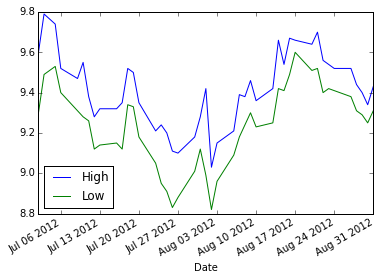

In [3]:
# %load snippets/prac1.py
f['2012-07':'2012-08'][['High', 'Low']].plot()

### Is the variance of the trading volume relatively stable over time?

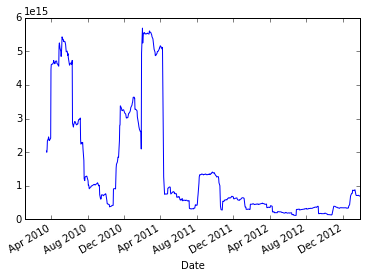

In [5]:
# %load snippets/prac2.py
r = f.rolling(50).var()['Volume'].plot()

### Is the expanding window variance of the trading volume relatively stable over time?

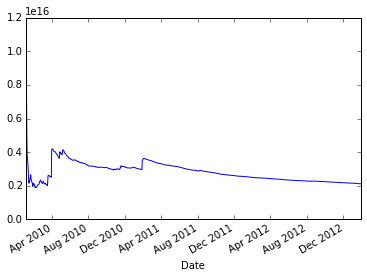

In [7]:
# %load snippets/prac3.py
r = f.expanding().var()['Volume'].plot()

### On how many days did the stock close higher than it opened?

Hint: check out .tshift() in the pandas docs
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#shifting-lagging

In [13]:
# %load snippets/prac4.py
lagged = f.shift(1)
sum((f - lagged)['Open'] > 0)
f['DayGain'] = f['Open'] - lagged['Open']
sum(f['DayGain'] > 0)/len(f['DayGain'])

0.49740932642487046

### And did the 'up' days become more or less frequent over time?

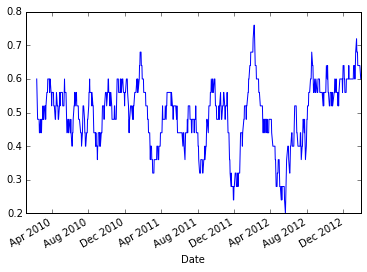

In [14]:
# %load snippets/prac5.py
f.rolling(window = 25)['DayGain'].apply(lambda x: len([x_i for x_i in x if x_i > 0])/len(x)).plot()

### Compute and plot the mean monthly High value of the stock

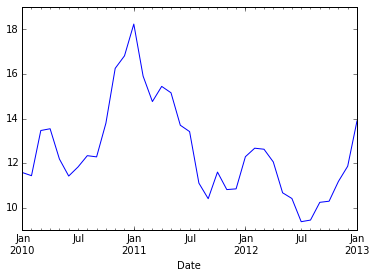

In [15]:
# %load snippets/prac6.py
f.resample('M').mean()['High'].plot()

### Explore the variance of the differenced volume

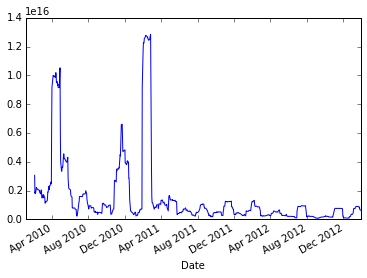

In [16]:
# %load snippets/prac7.py
volume = f.Volume
volume_lagged = f.Volume.shift()
diffed_volume = volume - volume_lagged
diffed_volume.rolling(window = 20).var().plot()

### Does the lagged time series correlate with itself?

In [17]:
# %load snippets/prac8.py
pd.DataFrame({'real':f.Volume, 'lagged':f.Volume.shift()}).corr()

,lagged,real
lagged,1.000000,0.656506
real,0.656506,1.000000
